In [1]:
from PIL import Image
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
train_dir = 'Documents/Cours/Semestre_5/Projet_Annuel/AnnualProject/Project/Dataset/Train'
test_dir = 'Documents/Cours/Semestre_5/Projet_Annuel/AnnualProject/Project/Dataset/Test'

In [36]:
batch_size = 32
epochs = 100
IMG_HEIGHT = 50
IMG_WIDTH = 50
CLASS_NAMES=np.array(['makise', 'cc', 'rem'])

In [37]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           zoom_range=0.3,
                                           vertical_flip=True)
                                           # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [38]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode='rgb',
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           classes=list(CLASS_NAMES),
                                                           class_mode='categorical')


Found 976 images belonging to 3 classes.


In [39]:
validation_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_dir,
                                                           shuffle=True,
                                                           color_mode='rgb',
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           classes=list(CLASS_NAMES),
                                                           class_mode='categorical')


Found 180 images belonging to 3 classes.


In [8]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')


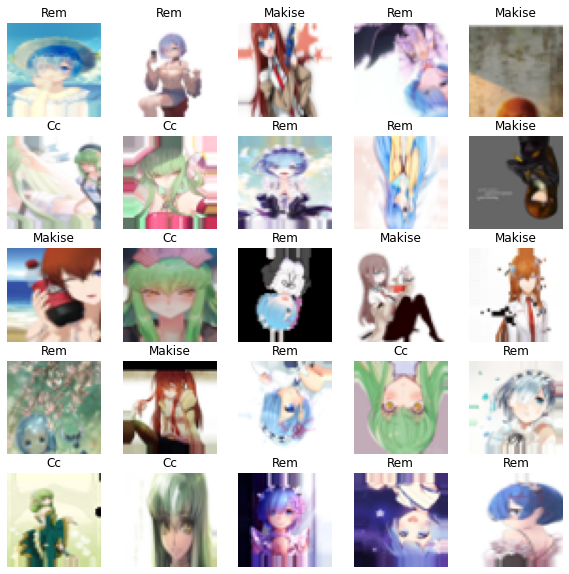

In [9]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)


In [74]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(50,50,3)),
    keras.layers.Dense(2500, activation='tanh'),
    keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dense(3, activation='softmax')
])


In [78]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['categorical_accuracy'])


In [79]:
log_dir = "Documents/Cours/Semestre_5/Projet_Annuel/AnnualProject/Project/Tests/Keras/tanh-7500-2500-50-0005-adam-cce"
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [59]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 7500)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 2500)              18752500  
_________________________________________________________________
dense_29 (Dense)             (None, 500)               1250500   
_________________________________________________________________
dense_30 (Dense)             (None, 50)                25050     
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 153       
Total params: 20,028,203
Trainable params: 20,028,203
Non-trainable params: 0
_________________________________________________________________


In [80]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=validation_data_gen,
    callbacks=[tb_callback]
)


Epoch 1/200
20/20 [==============================] - 10s 521ms/step - loss: 2.5163 - categorical_accuracy: 0.3607 - val_loss: 2.4474 - val_categorical_accuracy: 0.3333
Epoch 2/200
20/20 [==============================] - 3s 131ms/step - loss: 1.8465 - categorical_accuracy: 0.3453 - val_loss: 1.8249 - val_categorical_accuracy: 0.3333
Epoch 3/200
20/20 [==============================] - 3s 133ms/step - loss: 1.4006 - categorical_accuracy: 0.3627 - val_loss: 1.2990 - val_categorical_accuracy: 0.3333
Epoch 4/200
20/20 [==============================] - 3s 141ms/step - loss: 1.1224 - categorical_accuracy: 0.3555 - val_loss: 1.1029 - val_categorical_accuracy: 0.3333
Epoch 5/200
20/20 [==============================] - 3s 137ms/step - loss: 1.0957 - categorical_accuracy: 0.3576 - val_loss: 1.1049 - val_categorical_accuracy: 0.3333
Epoch 6/200
20/20 [==============================] - 3s 140ms/step - loss: 1.0879 - categorical_accuracy: 0.3576 - val_loss: 1.1139 - val_categorical_accuracy: 0.33

KeyboardInterrupt: ignored